In [1]:
# Import libraries
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
import json
from typing import Union
import numpy as np
import itertools
from disagreement import Disagreement
import glob
import joblib

In [16]:
!ls /storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/new/model_outputs/artifacts/

cost_sorted_k_baseline_model
lgbm_classifier_numl_100_md_10_lr_0.01
lgbm_classifier_numl_100_md_10_lr_0.05
lgbm_classifier_numl_200_md_20_lr_0.05
lgbm_classifier_numl_50_md_10_lr_0.01
logistic_regression_mi_250_p_l2_minmax
logistic_regression_mi_250_p_l2_standard
logistic_regression_mi_50_p_l1_minmax
logistic_regression_mi_50_p_l1_standard
nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40
nn_lr_0.01_loss_binary_crossentropy_activation_relu_epochs_30
random_forest_t_1000_md_10
random_forest_t_300_md_10
random_k_baseline_model
xgb_classifier_t_1000_md_10_lr_0.1
xgb_classifier_t_200_md_10_lr_0.1
xgb_classifier_t_200_md_10_lr_0.2


In [14]:
root = "/storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/new/model_outputs/"
model_path = "lgbm_classifier_numl_100_md_10_lr_0.05/"
model_name = "lgbm_classifier_numl_100_md_10_lr_0.05"
art_root = root + "artifacts/"
analysis_path = root + "analysis/2024/"
model_type = 'lgbm' # Types: nn, xgb, lgbm, lr, rf
save_path = analysis_path + model_path + f"global_feature_importance/"
is_nn = False
num_of_folds = 6

In [15]:
# Get models
models_list = None
if is_nn:
    model_files = glob.glob(f"{art_root + model_path}/*.h5")
    model_file_names = [os.path.basename(file) for file in model_files]
    models_list = sorted(model_file_names)
else:
    model_files = glob.glob(f"{art_root + model_path}/*.sav")
    model_files_names = [os.path.basename(file) for file in model_files]
    models_list = sorted(model_files_names)

print(models_list) # Names of models

['nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_1_2016-01-07.h5', 'nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_2_2015-09-09.h5', 'nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_3_2015-05-12.h5', 'nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_4_2015-01-12.h5', 'nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_5_2014-09-14.h5', 'nn_lr_0.005_loss_binary_crossentropy_activation_relu_epochs_40_fold_6_2014-05-17.h5']


In [4]:
# Function to save images
def save_image(caption, path):
    set_path = f'{path}/{caption}.png'
    plt.savefig(set_path, bbox_inches='tight')

In [5]:
# Function to load the pickle file and return the feature importances
def load_model_and_feat(model_path, model_name, model_type):
    # Load the model
    model = None
    importance = None
    feat_names = None

    model_file_path = f'{model_path}{model_name}'
    
    if model_type == 'nn': 
        model = keras.models.load_model(model_file_path)
        # Skip the rest

    elif model_type == 'lgbm':
        model = joblib.load(model_file_path)
        # Load the feature importance array
        importance = model.feature_importances_
        # Get the feature names
        feat_names = model.feature_name_

    elif model_type == 'lr':
        model = joblib.load(model_file_path)
        # Load the feature importance array
        importance = model.coef_[0]
        # Get the feature names
        feat_names = model.feature_names_in_
    
    else:
        model = joblib.load(model_file_path)
        # Load the feature importance array
        importance = model.feature_importances_
        # Get the feature names
        feat_names = model.feature_names_in_
    
    return importance, feat_names


# Function to sort features and output
def sort_features(importance, feat_names):
    # Create df and sort
    df = pd.DataFrame({"Feature": feat_names, "Importance": importance})
    #df_sorted = df.sort_values("Importance", ascending=False)
    df_sorted = df.reindex(df.Importance.abs().sort_values(ascending=False).index)
    return df_sorted

def make_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
def generate_image_order(global_explanation_feat, model_type, n_features, images_save_path, fold_num):

    plt.cla()
    
    fig = plt.figure(figsize=(10, 5))
    plt.barh(global_explanation_feat["Feature"][:n_features], global_explanation_feat["Importance"][:n_features])
    plt.xlim(0, 1)
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.title(f"Global Explanation for {model_name} for fold {fold_num}")
    plt.tight_layout()
    # Create save path
    make_directory(images_save_path)
    save_image(f"{model_type}_global_explanation_top_{n_features}", images_save_path)
    plt.show()
    return

In [8]:
def generate_image(global_explanation_feat, model_type, n_features, images_save_path, fold_num):

    plt.cla()
    
    fig = plt.figure(figsize=(10, 5))
    plt.barh(global_explanation_feat["Feature"][:n_features], global_explanation_feat["Importance"][:n_features])
    plt.xlim(0, 1000)
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.title(f"Global Explanation for {model_name} for fold {fold_num}")
    plt.tight_layout()
    # Create save path
    make_directory(images_save_path)
    save_image(f"{model_type}_global_explanation_top_{n_features}", images_save_path)
    plt.show()
    return

Fold 1 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_1_2016-01-07.sav
[411 579 595 214  91 486   3 396  27 636   0 673 202  97 618 256 460 589
 289   2 440   9  49  29  16   7   0   0   2   8   1   5   0  14   0   0
   0   0   0   1   0   1   0   0   2   0  11   0   0  29   0   0   2  16
  19  13   0  32   5   0   0   4  10   4   0   9   0   0   0   0   0  14
   0   0   0   0   0   5   0   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   1   0   2   0   0   0   0   0   0   1   0   1   0   0   0
   4   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0
   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

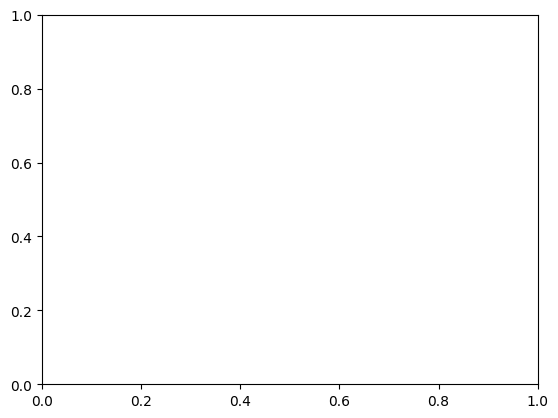

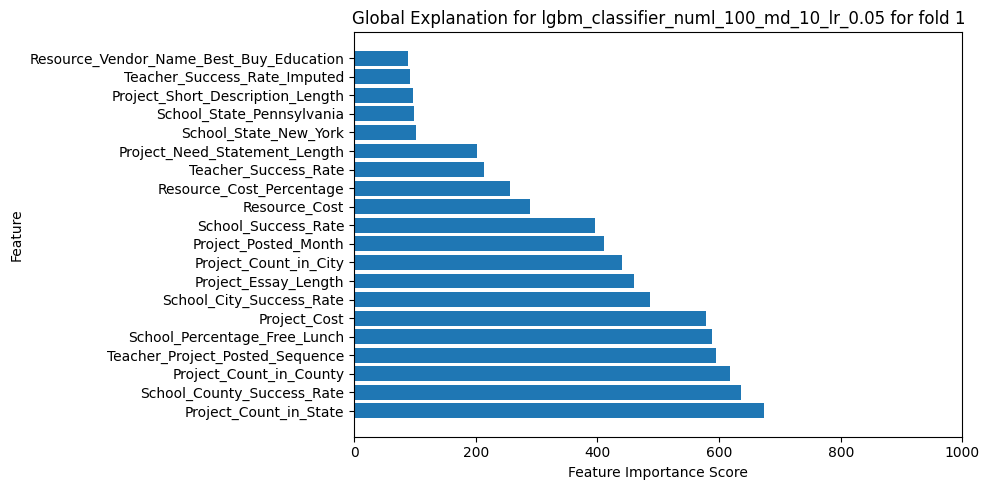

Fold 2 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_2_2015-09-09.sav
[694 664 515 153  62 394   3 238  18 597   1 727 103  67 596 196 389 589
 231   2 594   1   0  83  14   7   0   0   2   0   2   2   0  29   0   0
   0   0   0   4   0   0   0   0   3   0   5   0   0  20   1   0   7  24
  12  26   0  49   6   0   0   2   8   6   0  20   0   0   0   0   0   1
   0   1   0   0   0   3   0   0   2   0   0   1   0   1   0   0   0   0
   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

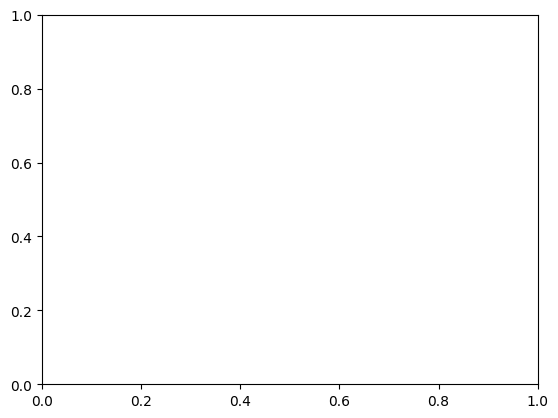

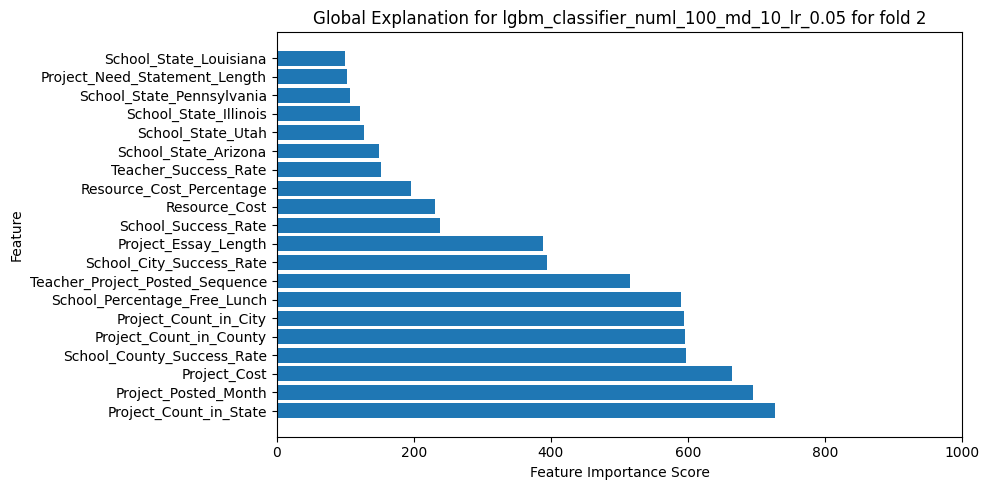

Fold 3 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_3_2015-05-12.sav
[489 773 556 182  42 347  16 316  11 630   2 628 136  93 668 233 454 611
 252   7 535   0   1  29  61   4   0   0  10   1   0   3   0  21   0   0
   0   0   0   0   0  28   0   0   8   4   0   0   0  23   3   0   7  17
   5   7   0  73   4   0   1   0   1   4   0  20   0   0   0   0   0   7
   0   0   0   0   0   4   0   0   0   0   0   0   0   2   0   0   0   0
   0   0   0   0   0   5   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0 

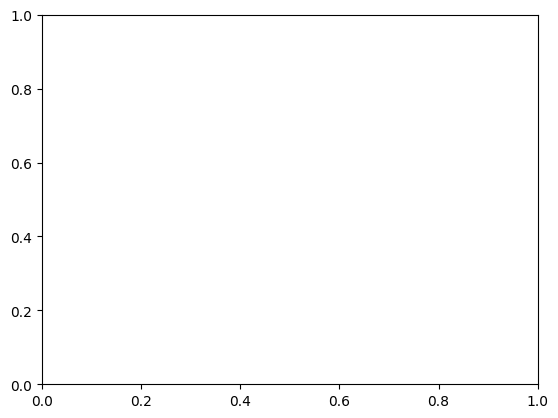

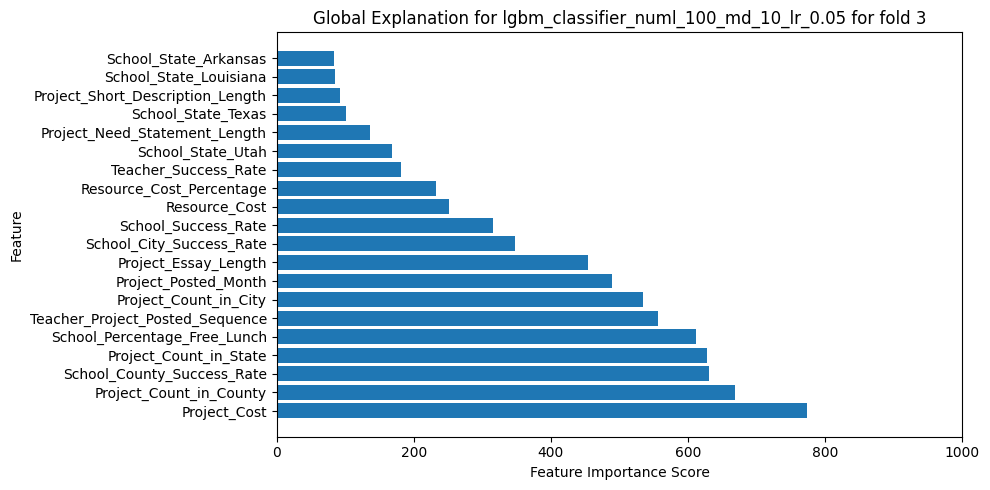

Fold 4 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_4_2015-01-12.sav
[351 832 518 207  94 452   8 374  38 569   0 541 240 151 589 293 523 544
 340   3 519   7 169   0  37   6   4   1   9   3   0  11   0   5   0   0
   0   0   0   0   0  18   0   0   5   8   0   5   0  37   2   0   2  21
   5  20   0  42  16   1   5   1  12   2   0  38   0   0   0   1   0   6
   0   0   0   0   0  18   0   0   0   0   0   0   0   2  10   0   0   0
   5   0   0   0   0  15   0   0   0   0   0   0   0   0   1   0   4   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  12   0   0   0   0
   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0
   0 

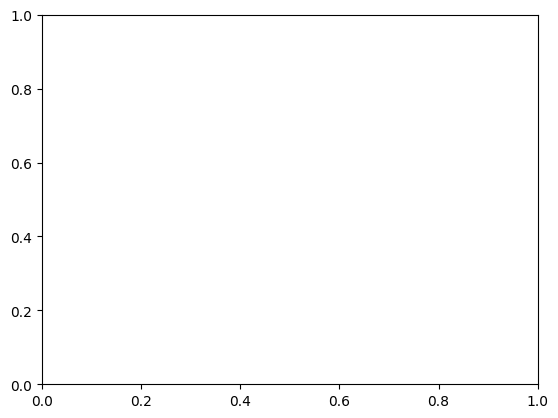

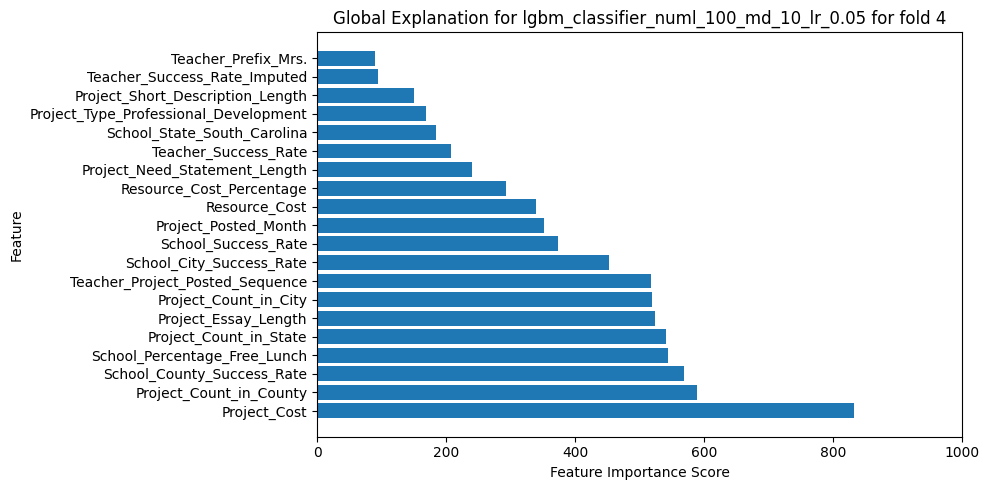

Fold 5 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_5_2014-09-14.sav
[458 734 472 189  90 357   0 361  27 580   3 568 178  93 769 223 394 623
 253   8 668   0  73   0   8   8   0   0   5   1   0   7   0   5   0   0
   0   0   0   0   0   3   0   0   1   1   3   5   0  33   4   0   6  30
   3   9   0  52   6   0   4   4   4   0   0  58   0   0   0   0   0   3
   0   0   0   0   0   5   0   0   2   0   0   0   0   2   0   0   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   2   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

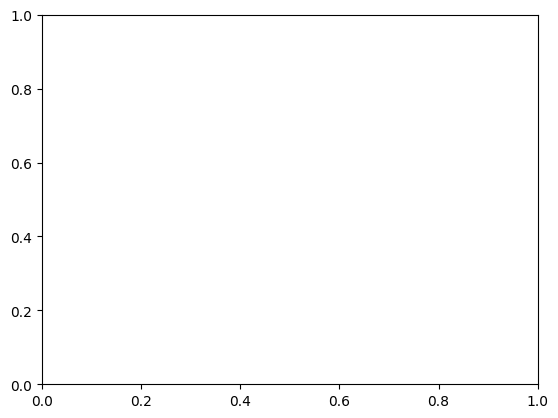

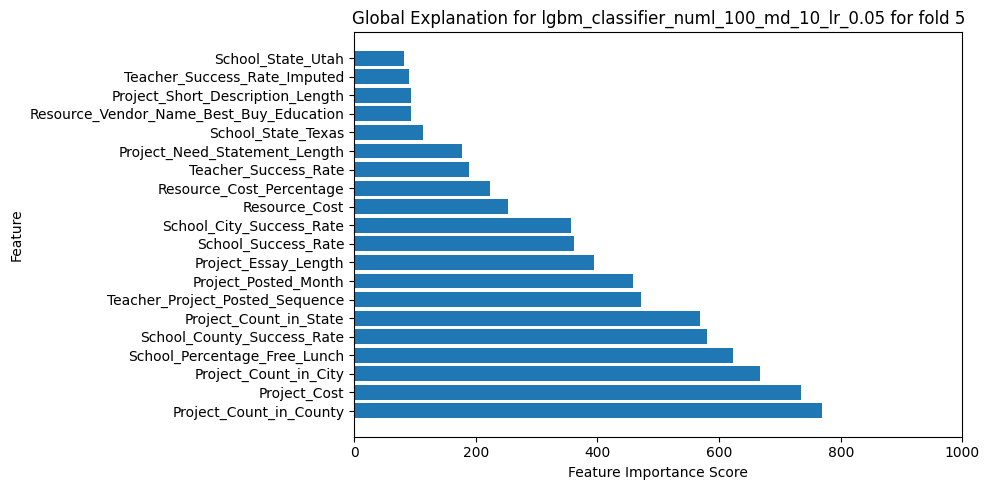

Fold 6 ------------------------------------------
Model - lgbm_classifier_numl_100_md_10_lr_0.05_fold_6_2014-05-17.sav
[515 631 515 143  35 368  16 305  26 706   4 749 120  80 911 182 345 650
 209   2 688   0   0   0   0   5   0   0   4   1   5   0   0   7   0   0
   0   0   0   0   0   8   0   0   2   1   0   0   0  15   2   0   0  14
   7   2   0  29   3   0   2   4   5   2   0  67   0   0   0   0   0   3
   0   2   0   0   0   1   0   0   0   0   0   0   0   4   0   0   0   0
   0   0   0   0   0   3   0   0   0   0   0   0   3   0   0   0   0   0
   3   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0 

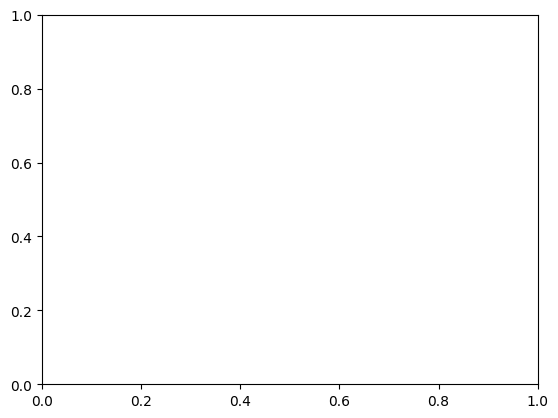

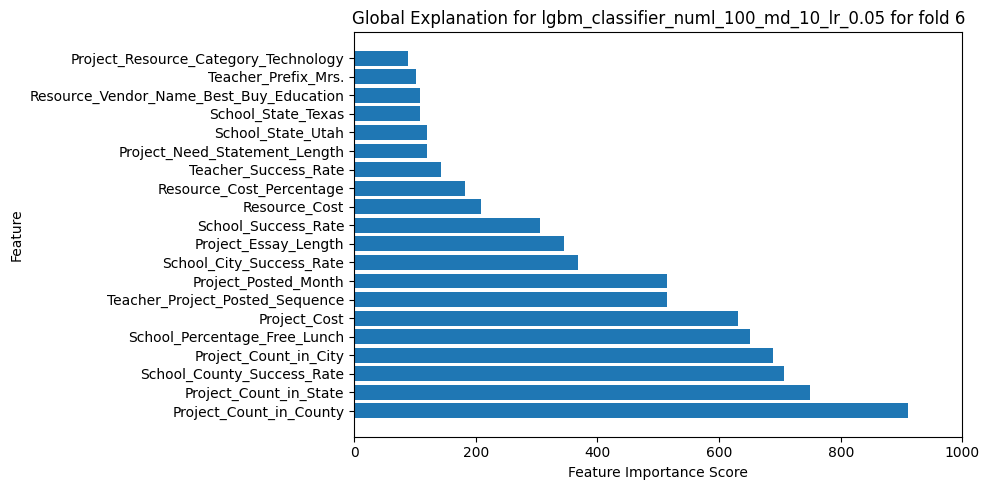

In [9]:
# Load model and get global exp for each fold
for i in range(1, num_of_folds+1):
    print(f'Fold {i} ------------------------------------------')
    print(f'Model - {models_list[i-1]}')
    global_importance, feat_names = load_model_and_feat(art_root+model_path, models_list[i-1], model_type)
    print(global_importance)
    global_explanation_feat = sort_features(global_importance, feat_names)
    global_explanation_feat.values
    generate_image(global_explanation_feat, model_type, 20, f'{save_path}Fold_{i}', i)

In [54]:
global_explanation_feat

,Feature,Importance
14,Project_Count_in_County,911
11,Project_Count_in_State,749
9,School_County_Success_Rate,706
20,Project_Count_in_City,688
17,School_Percentage_Free_Lunch,650
...,...,...
238,Project_Subject_Subcategory_Tree_Early_Develop...,0
237,Project_Subject_Subcategory_Tree_Early_Develop...,0
236,Project_Subject_Subcategory_Tree_Early_Develop...,0
235,Project_Subject_Subcategory_Tree_ESL_Warmth_Ca...,0
